In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
through = pd.read_csv('./result/throughput.csv', index_col=0)
output = pd.read_csv('./result/output.csv', index_col=0)

In [3]:
full = pd.concat([
    output,
    through
], axis=1)

full = full.rename(
    columns={
        'R01049': 'PRPP', 
        'R00268': 'amino_acid', 
        'R00351': 'Citric acid', 
        'R02740': 'Fructose 6-phosphate',
        'Lactate_output': 'Lactate',
        'Glucose_input': 'Glucose',
        'Biomass': 'Doubling Time'
    }
)

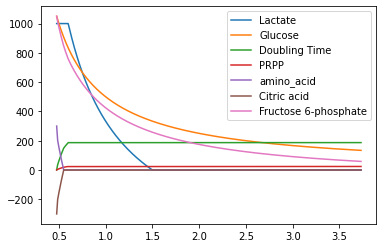

In [4]:
full.plot()

In [5]:
# full = full[(full.Lactate_output != 0) & (full.Glucose_input != 0) & (full.R00268 != 0) & (full.R00351 != 0)]

In [6]:
full.describe()

,Lactate,Glucose,Doubling Time,PRPP,amino_acid,Citric acid,Fructose 6-phosphate
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,509.398958,592.000000,168.916202,21.722455,19.605816,-19.605816,523.793499
std,399.010129,264.859397,41.656467,5.356980,54.986572,54.986572,276.031543
min,0.000000,134.000000,0.000000,0.000000,0.000000,-300.000000,58.479417
25%,59.237686,363.000000,187.029820,24.051848,0.000000,0.000000,287.479420
50%,517.237690,592.000000,187.029820,24.051848,0.000000,0.000000,516.479420
75%,975.237690,821.000000,187.029820,24.051848,0.000000,0.000000,745.479420
max,1000.000000,1050.000000,187.029820,24.051848,300.000000,0.000000,1050.000000


In [7]:
full = (full.T/np.array(full['Lactate'])).T.dropna()

 - PPRP (R01049)、 aKG (R00268)
 - Citrate (R00351), Succinate (R00405), F6P (R02740)

In [8]:
d = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = d.columns
slope = pd.concat([d, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([21.78, 12.8, 16.84], columns=['Doubling Time'] , index=slope.columns).T])
s = slope.drop('Glutamate')

In [9]:
s.T

,Glucose,Lactate,Doubling Time
Control,0.082599,0.636289,21.78
Clone A,0.041715,3.734983,12.80
Clone B,0.013963,1.916520,16.84


In [10]:
f = pd.read_excel('../result/metabo_mean.xlsx', index_col=0).T

In [11]:
PRPP = f[['Cytosine', 'Uracil', 'Adenine', 'Guanine']]
PRPP_sum = []
for i in PRPP.index:
    PRPP_sum.append(sum(PRPP.T[i]))

PRPP_sum = pd.DataFrame(PRPP_sum, columns=['PRPP'], index=PRPP.index)

In [12]:
amino_acid = f[[
    'Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser'
]]

amino_acid_sum = []
for i in amino_acid.index:
    amino_acid_sum.append(sum(amino_acid.T[i]))
    
amino_acid_sum = pd.DataFrame(amino_acid_sum, columns=['amino_acid'], index=amino_acid.index)

In [13]:
metabo = pd.concat([
    f[['Fructose 6-phosphate', 'Citric acid']],
    amino_acid_sum,
    PRPP_sum
], axis=1).T

In [14]:
res = pd.concat([
    s, 
    metabo
])

In [15]:
res['Control']

Glucose                   0.082599
Lactate                   0.636289
Doubling Time            21.780000
Fructose 6-phosphate      0.144104
Citric acid               0.178913
amino_acid              145.107993
PRPP                      3.575803
Name: Control, dtype: float64

- 出すのは8月
- 査読が1ヶ月くらい
- 金谷先生の方が10月

In [16]:
# 実測値
# 各列ごとでの正規化
# 最大値か平均値

res.T.mean()

Glucose                   0.046092
Lactate                   2.095931
Doubling Time            17.140000
Fructose 6-phosphate      0.157880
Citric acid               0.217001
amino_acid              163.259274
PRPP                     17.496905
dtype: float64

In [17]:
res

,Control,Clone A,Clone B
Glucose,0.082599,0.041715,0.013963
Lactate,0.636289,3.734983,1.916520
Doubling Time,21.780000,12.800000,16.840000
Fructose 6-phosphate,0.144104,0.230723,0.098812
Citric acid,0.178913,0.273265,0.198826
amino_acid,145.107993,254.877733,89.792096
PRPP,3.575803,41.658387,7.256526


In [18]:
res_mean = (res.T/res.T.mean()).T

In [19]:
res_mean

,Control,Clone A,Clone B
Glucose,1.792021,0.905036,0.302943
Lactate,0.303583,1.782016,0.914401
Doubling Time,1.270712,0.746791,0.982497
Fructose 6-phosphate,0.912744,1.461385,0.625871
Citric acid,0.824478,1.259277,0.916245
amino_acid,0.888819,1.561184,0.549997
PRPP,0.204368,2.380900,0.414732


In [20]:
# FBA
# 各列ごとでの正規化
# 最大値か平均値

full

,Lactate,Glucose,Doubling Time,PRPP,amino_acid,Citric acid,Fructose 6-phosphate
1.497006,1.0,269.858364,151.112459,19.432911,0.000000,0.000000,208.840819
1.492537,1.0,103.468949,57.766504,7.428715,0.000000,0.000000,80.143472
1.488095,1.0,64.150463,35.708481,4.592075,0.000000,0.000000,49.731772
1.483680,1.0,46.561841,25.841106,3.323140,0.000000,0.000000,36.127487
1.479290,1.0,36.589249,20.246392,2.603666,0.000000,0.000000,28.413979
...,...,...,...,...,...,...,...
0.478011,1.0,1.046000,0.006415,0.000825,0.282850,-0.282850,1.043410
0.477555,1.0,1.047000,0.004811,0.000619,0.287138,-0.287138,1.045057
0.477099,1.0,1.048000,0.003208,0.000412,0.291425,-0.291425,1.046705
0.476644,1.0,1.049000,0.001604,0.000206,0.295713,-0.295713,1.048352


In [21]:
full_mean = full/full.mean()

In [22]:
full_mean

,Lactate,Glucose,Doubling Time,PRPP,amino_acid,Citric acid,Fructose 6-phosphate
1.497006,1.0,111.453782,145.828447,145.828447,0.000000,-0.000000,104.272448
1.492537,1.0,42.733549,55.746559,55.746559,0.000000,-0.000000,40.014955
1.488095,1.0,26.494683,34.459847,34.459847,0.000000,-0.000000,24.830652
1.483680,1.0,19.230433,24.937510,24.937510,0.000000,-0.000000,18.038148
1.479290,1.0,15.111668,19.538428,19.538428,0.000000,-0.000000,14.186858
...,...,...,...,...,...,...,...
0.478011,1.0,0.432007,0.006191,0.006191,11.280316,11.280316,0.520966
0.477555,1.0,0.432420,0.004643,0.004643,11.451304,11.451304,0.521788
0.477099,1.0,0.432833,0.003095,0.003095,11.622292,11.622292,0.522611
0.476644,1.0,0.433246,0.001548,0.001548,11.793281,11.793281,0.523433


In [23]:
g = 60000
for i in full_mean.index:
    mse = (
        (res_mean['Control']['PRPP'] - full_mean.T[i]['PRPP'])**2
    + (res_mean['Control']['amino_acid'] - full_mean.T[i]['amino_acid'])**2
    + (res_mean['Control']['Citric acid'] - full_mean.T[i]['Citric acid'])**2
    + (res_mean['Control']['Lactate'] - full_mean.T[i]['Lactate'])**2
    + (res_mean['Control']['Glucose'] - full_mean.T[i]['Glucose'])**2
    + (res_mean['Control']['Doubling Time'] - full_mean.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
Control = l

1.497005988023952
1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358
1.3966480446927374
1.3927576601671308
1.3888888888888888
1.3850415512465375
1.3812154696132597
1.3774104683195592
1.3736263736263736
1.3698630136986298
1.3661202185792352
1.3623978201634876
1.358695652173913
1.3550135501355014
1.351351351351351
1.3477088948787062
1.3440860215053765
1.3404825737265416
1.3368983957219251
1.3333333333333333
1.3297872340425532
1.326259946949602
1.3227513227513228
1.3192612137203166
1.3157894736842106
1.3123359580052494
1.3089005235602094
1.3054830287206267
1.3020833333333333
1.2987012987012987
1.2953367875647668
1

In [24]:
g = 67000
for i in full_mean.index:
    mse = (
        (res_mean['Clone A']['PRPP'] - full_mean.T[i]['PRPP'])**2
    + (res_mean['Clone A']['amino_acid'] - full_mean.T[i]['amino_acid'])**2
    + (res_mean['Clone A']['Citric acid'] - full_mean.T[i]['Citric acid'])**2
    + (res_mean['Clone A']['Lactate'] - full_mean.T[i]['Lactate'])**2
    + (res_mean['Clone A']['Glucose'] - full_mean.T[i]['Glucose'])**2
    + (res_mean['Clone A']['Doubling Time'] - full_mean.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
CloneA = l

1.497005988023952
1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358
1.3966480446927374
1.3927576601671308
1.3888888888888888
1.3850415512465375
1.3812154696132597
1.3774104683195592
1.3736263736263736
1.3698630136986298
1.3661202185792352
1.3623978201634876
1.358695652173913
1.3550135501355014
1.351351351351351
1.3477088948787062
1.3440860215053765
1.3404825737265416
1.3368983957219251
1.3333333333333333
1.3297872340425532
1.326259946949602
1.3227513227513228
1.3192612137203166
1.3157894736842106
1.3123359580052494
1.3089005235602094
1.3054830287206267
1.3020833333333333
1.2987012987012987
1.2953367875647668
1

In [25]:
g = 50000
for i in full_mean.index:
    mse = (
        (res_mean['Clone B']['PRPP'] - full_mean.T[i]['PRPP'])**2
    + (res_mean['Clone B']['amino_acid'] - full_mean.T[i]['amino_acid'])**2
    + (res_mean['Clone B']['Citric acid'] - full_mean.T[i]['Citric acid'])**2
    + (res_mean['Clone B']['Lactate'] - full_mean.T[i]['Lactate'])**2
    + (res_mean['Clone B']['Glucose'] - full_mean.T[i]['Glucose'])**2
    + (res_mean['Clone B']['Doubling Time'] - full_mean.T[i]['Doubling Time'])**2
    )
    if mse < g:
        g = mse
        l = i
        print(i)
        
CloneB = l

1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358
1.3966480446927374
1.3927576601671308
1.3888888888888888
1.3850415512465375
1.3812154696132597
1.3774104683195592
1.3736263736263736
1.3698630136986298
1.3661202185792352
1.3623978201634876
1.358695652173913
1.3550135501355014
1.351351351351351
1.3477088948787062
1.3440860215053765
1.3404825737265416
1.3368983957219251
1.3333333333333333
1.3297872340425532
1.326259946949602
1.3227513227513228
1.3192612137203166
1.3157894736842106
1.3123359580052494
1.3089005235602094
1.3054830287206267
1.3020833333333333
1.2987012987012987
1.2953367875647668
1.2919896640826871


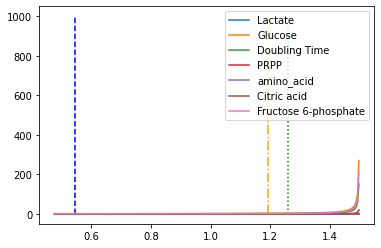

In [26]:
full.plot(logy=False)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([CloneA], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

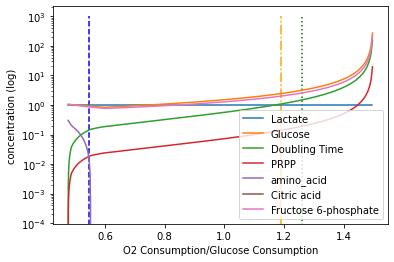

In [27]:
full.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

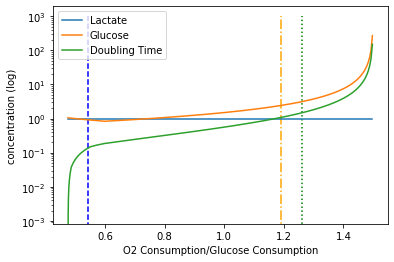

In [28]:
full[['Lactate', 'Glucose', 'Doubling Time']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

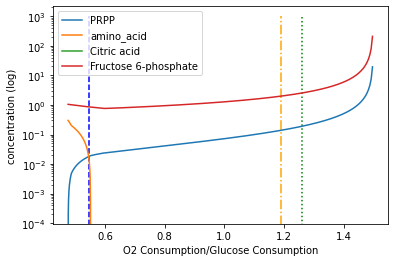

In [29]:
full[['PRPP', 'amino_acid', 'Citric acid', 'Fructose 6-phosphate']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

In [30]:
full = pd.concat([
    output,
    through
], axis=1)

full = full.rename(
    columns={
        'R01049': 'PRPP', 
        'R00268': 'amino_acid', 
        'R00351': 'Citric acid', 
        'R02740': 'Fructose 6-phosphate',
        'Lactate_output': 'Lactate',
        'Glucose_input': 'Glucose',
        'Biomass': 'Doubling Time'
    }
)

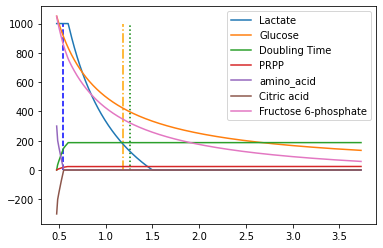

In [31]:
full.plot(logy=False)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([CloneA], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

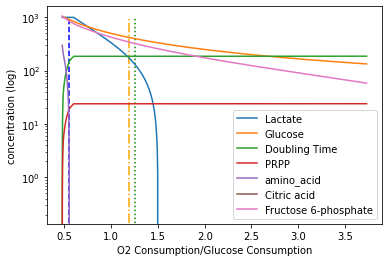

In [32]:
full.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

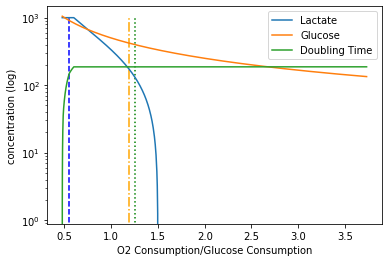

In [33]:
full[['Lactate', 'Glucose', 'Doubling Time']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

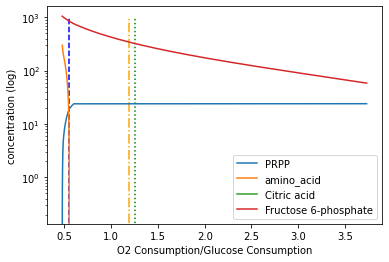

In [34]:
full[['PRPP', 'amino_acid', 'Citric acid', 'Fructose 6-phosphate']].plot(logy=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

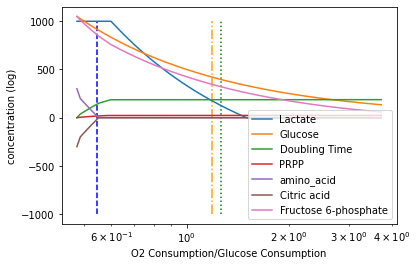

In [35]:
full.plot(logx=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

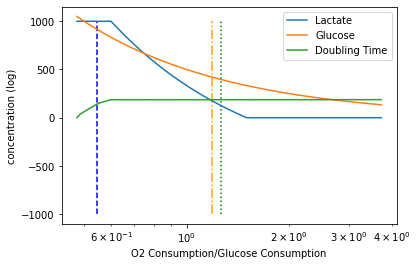

In [36]:
full[['Lactate', 'Glucose', 'Doubling Time']].plot(logx=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')

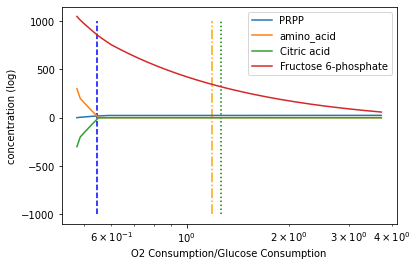

In [39]:
full[['PRPP', 'amino_acid', 'Citric acid', 'Fructose 6-phosphate']].plot(logx=True)
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([CloneA], -1000, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([Control], -1000, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([CloneB], -1000, 1000, "blue", linestyles='dashed', label='Clone B')